In [35]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from operators import measure_energy_per_site, dQn
from run_evolution import folder_evol, folder_gs


In [36]:
g = 1 / 5
L0 = 0
D0 = 64
ms = [0 * g, 0.1 * g, 0.318 * g, 1 * g]
Nas =  [(100, 1.0), (200, 0.5), (400, 0.25)]

engs, ents = {}, {}
T00, T11, T01 = {}, {}, {}
j0, j1, Ln = {}, {}, {}

for m in ms:
    for N, a in Nas:
        folder = folder_evol(g, m, L0, a, N, 1, 1, D0)
        engs[m, N] = np.loadtxt(folder / "engs.txt", delimiter=";")
        ents[m, N] = np.loadtxt(folder / "ents.txt", delimiter=";")
        T00[m, N] = np.loadtxt(folder / "T00.txt", delimiter=";")
        T01[m, N] = np.loadtxt(folder / "T01.txt", delimiter=";")
        T11[m, N] = np.loadtxt(folder / "T11.txt", delimiter=";")
        j0[m, N] = np.loadtxt(folder / "j0.txt", delimiter=";")
        j1[m, N] = np.loadtxt(folder / "j1.txt", delimiter=";")
        Ln[m, N] = np.loadtxt(folder / "Ln.txt", delimiter=";")


Excitation energy;  Ln includes charges Q(t); We subtract energy at t=0

Text(0.43, 1.0, 'excitation energy')

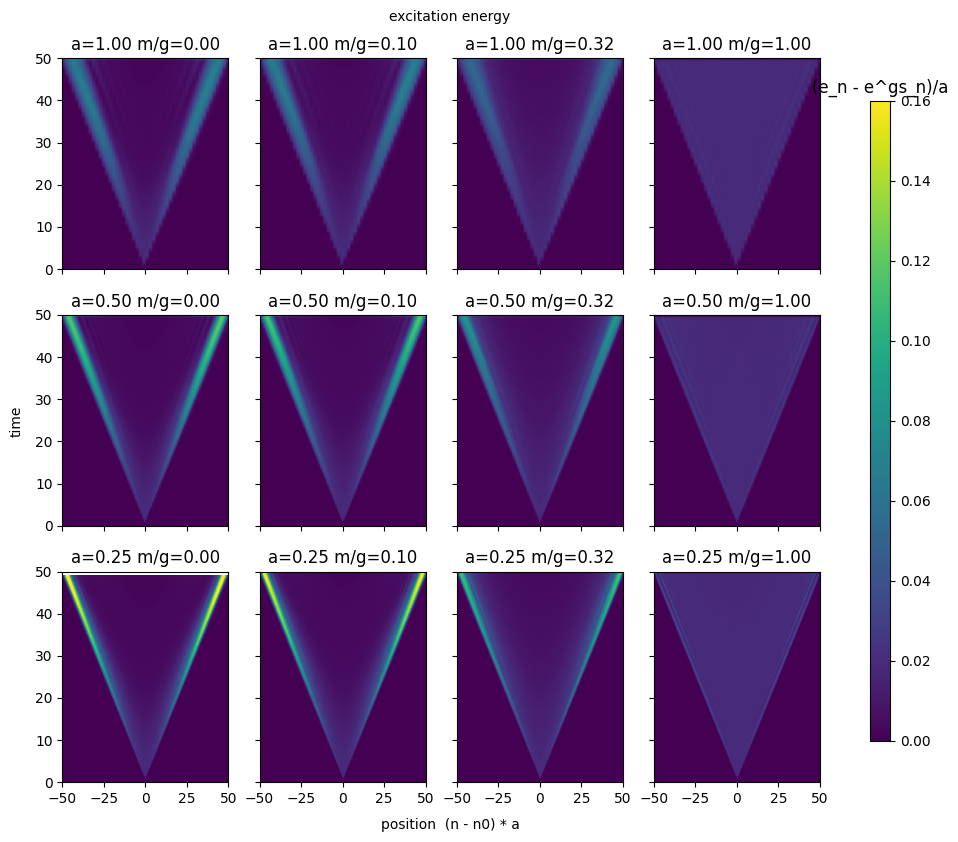

In [37]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 8))
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):

        ee = engs[m, N][:, 1:]
        tm = engs[m, N][:, 0]
        ee = (ee[:, 0::2] + ee[:, 1::2]) /2  #  here we calculate mean of sites 2*l and 2*l+1
        ee = np.insert(ee, 0, 0, 0)
        ee = ee / a

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]), origin='lower', aspect='auto', vmin=0, vmax=0.16)
        ax[j, i].set_title(f"{a=:0.2f} {m/g=:0.2f}")
        ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 50])
        # ax[j, i].set_xlabel("position")
        # ax[j, i].set_ylabel("time")
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('(e_n - e^gs_n)/a')

fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'excitation energy', ha='center')

Total energy in time

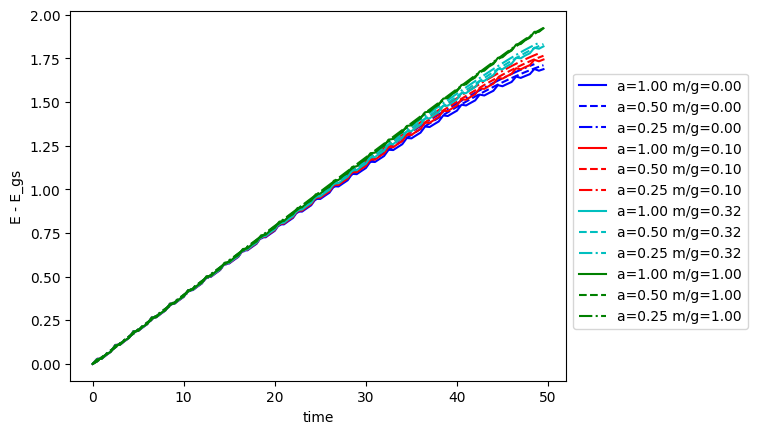

In [38]:
clrs = dict(zip(ms, 'brcg'))
smbs = {100: '-', 200: '--', 400: '-.'}

for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):
        ee = np.sum(engs[m, N][:-1, 1:], axis=1)
        tm = ents[m, N][:-1, 0]
        plt.plot(tm, ee, smbs[N], color=clrs[m], label=f"{a=:0.2f} {m/g=:0.2f}")
plt.xlabel('time')
plt.ylabel('E - E_gs')
plt.legend(ncols=1, bbox_to_anchor=(1, 0.85))

von Neuman entropy between left and right parts of the lattice (subtracting values in the initial state)

Text(0.43, 1.0, 'von Neuman entropy (above g.s. background)')

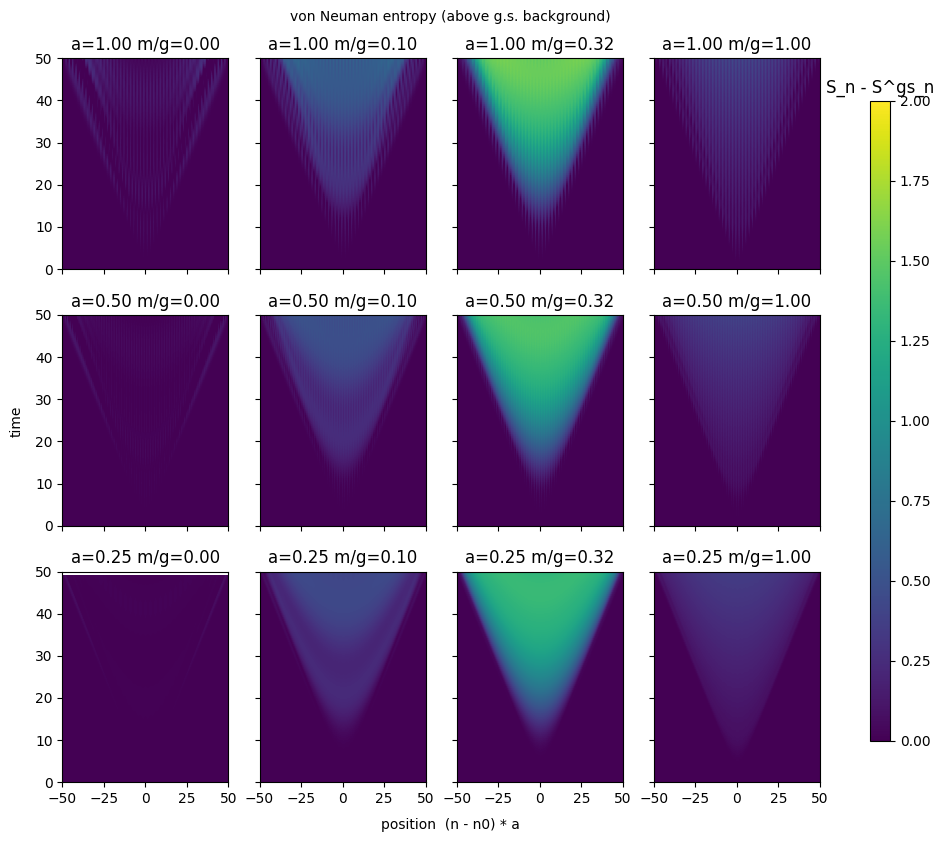

In [39]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 8))
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):

        ee = ents[m, N][:, 1:]
        ee0 = ee[0, :]
        ee = ee - ee0
        tm = ents[m, N][:, 0]

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]), origin='lower', aspect='auto', vmin=0, vmax=2)
        ax[j, i].set_title(f"{a=:0.2f} {m/g=:0.2f}")
        ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 50])
        # ax[j, i].set_xlabel("position")
        # ax[j, i].set_ylabel("time")
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('S_n - S^gs_n')

fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'von Neuman entropy (above g.s. background)', ha='center')


the above at n=n0 cut (without subtracting t=0 value)

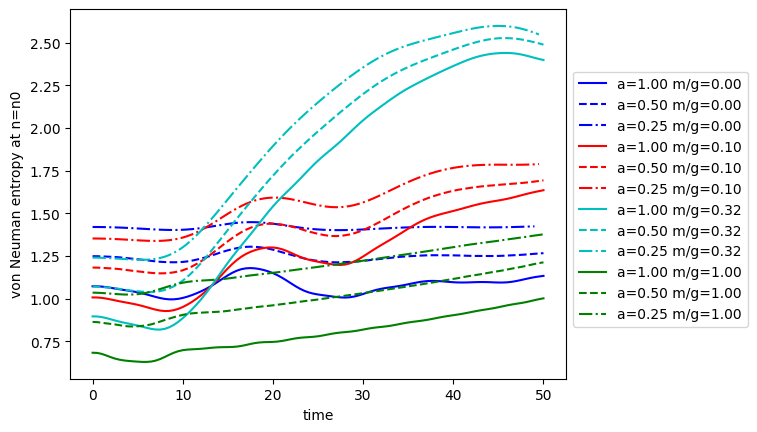

In [40]:
clrs = dict(zip(ms, 'brcg'))
smbs = {100: '-', 200: '--', 400: '-.'}

for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):
        ee = ents[m, N][:, 1:]
        eec = ee[:, N // 2]
        tm = ents[m, N][:, 0]
        plt.plot(tm, eec, smbs[N], color=clrs[m], label=f"{a=:0.2f} {m/g=:0.2f}")
plt.xlabel('time')
plt.ylabel('von Neuman entropy at n=n0')
plt.legend(ncols=1, bbox_to_anchor=(1, 0.85))

T00 (here, we do not include Q(t) in Ln). Compare with energy where this is done

Text(0.43, 1.0, 'T00(n) - T00(n, t=0)')

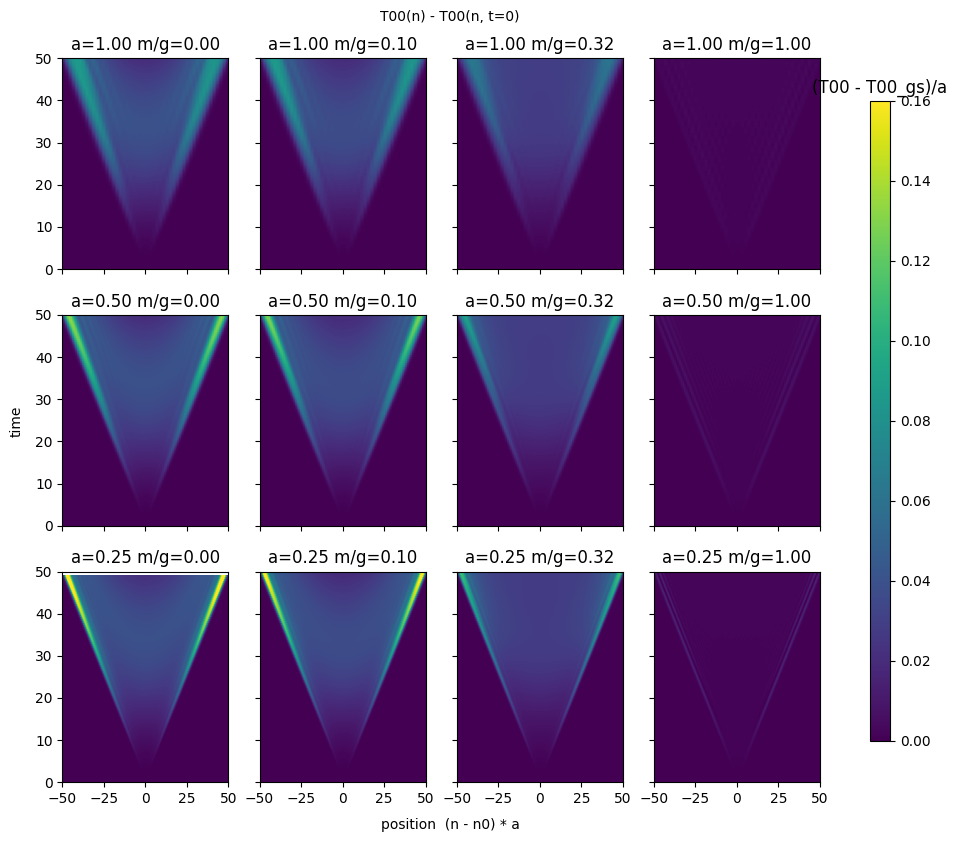

In [41]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 8))
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):

        ee = T00[m, N][:, 1:]
        tm = T00[m, N][:, 0]
        ee = (ee[:, 0::2] + ee[:, 1::2]) /2  #  here we calculate mean of sites 2*l and 2*l+1
        ee0 = ee[0, :]
        ee = ee - ee0
        ee = ee / a

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]), origin='lower', aspect='auto', vmin=0, vmax=0.16)
        ax[j, i].set_title(f"{a=:0.2f} {m/g=:0.2f}")
        ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 50])
        # ax[j, i].set_xlabel("position")
        # ax[j, i].set_ylabel("time")
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('(T00 - T00_gs)/a')

fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'T00(n) - T00(n, t=0)', ha='center')

T11 (here, we do not include Q(t) in Ln). 

Text(0.43, 1.0, 'T11(n) - T11(n, t=0)')

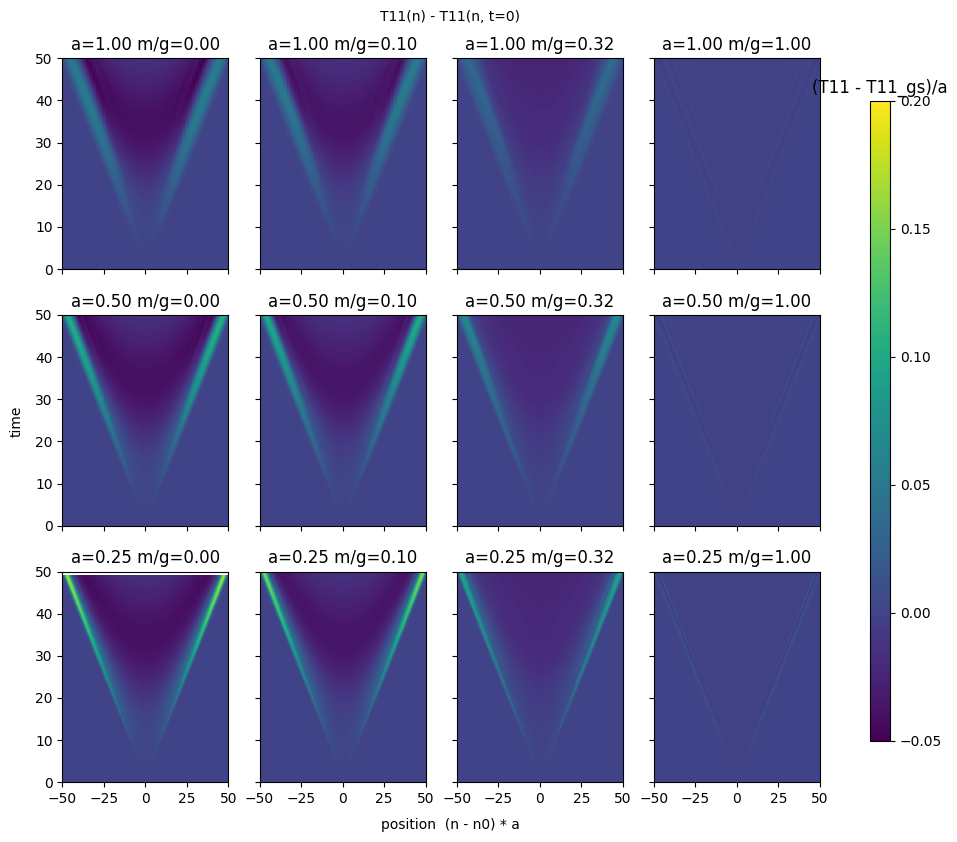

In [42]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 8))
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):

        ee = T11[m, N][:, 1:]
        tm = T11[m, N][:, 0]
        ee = (ee[:, 0::2] + ee[:, 1::2]) /2  #  here we calculate mean of sites 2*l and 2*l+1
        ee0 = ee[0, :]
        ee = ee - ee0
        ee = ee / a

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]), origin='lower', aspect='auto', vmin=-0.05, vmax=0.2)
        ax[j, i].set_title(f"{a=:0.2f} {m/g=:0.2f}")
        ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 50])
        # ax[j, i].set_xlabel("position")
        # ax[j, i].set_ylabel("time")
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('(T11 - T11_gs)/a')

fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'T11(n) - T11(n, t=0)', ha='center')

T01 

Text(0.43, 1.0, 'T01(n) - T01(n, t=0)')

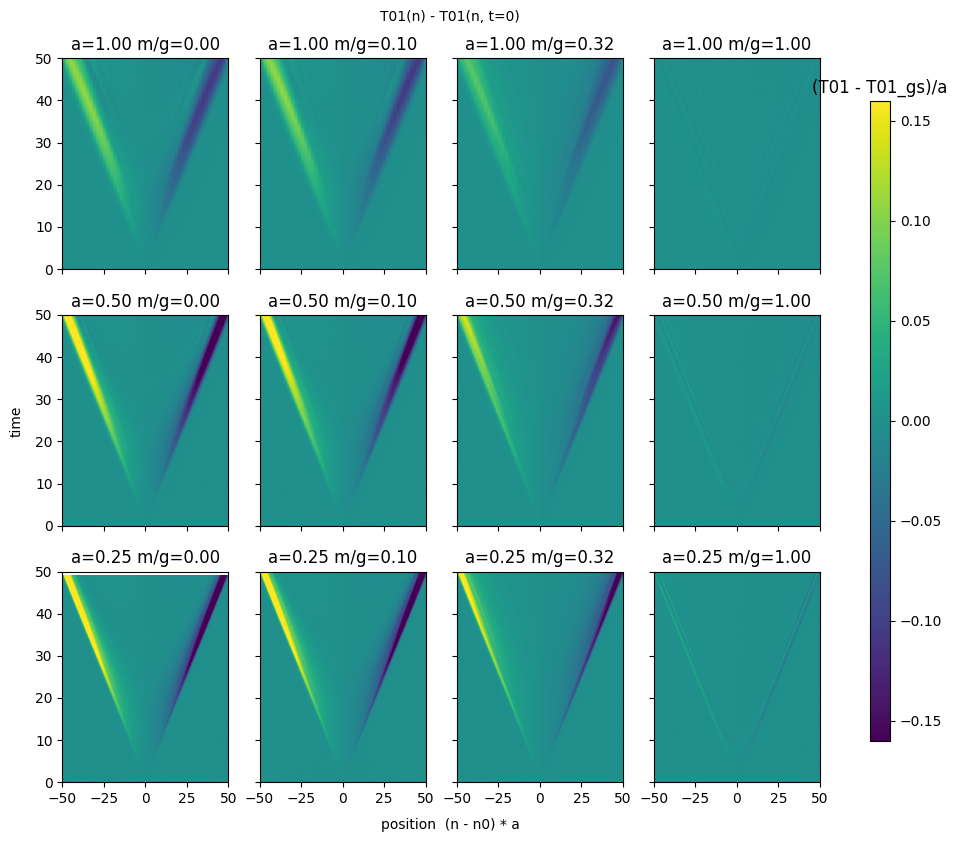

In [43]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 8))
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):

        ee = T01[m, N][:, 1:]
        tm = T01[m, N][:, 0]
        ee = (ee[:, 0::2] + ee[:, 1::2]) /2  #  here we calculate mean of sites 2*l and 2*l+1
        ee0 = ee[0, :]
        ee = ee - ee0
        ee = ee / a

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]), origin='lower', aspect='auto', vmin=-0.16, vmax=0.16)
        ax[j, i].set_title(f"{a=:0.2f} {m/g=:0.2f}")
        ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 50])
        # ax[j, i].set_xlabel("position")
        # ax[j, i].set_ylabel("time")
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('(T01 - T01_gs)/a')

fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'T01(n) - T01(n, t=0)', ha='center')

j0

Text(0.43, 1.0, 'j0(n)')

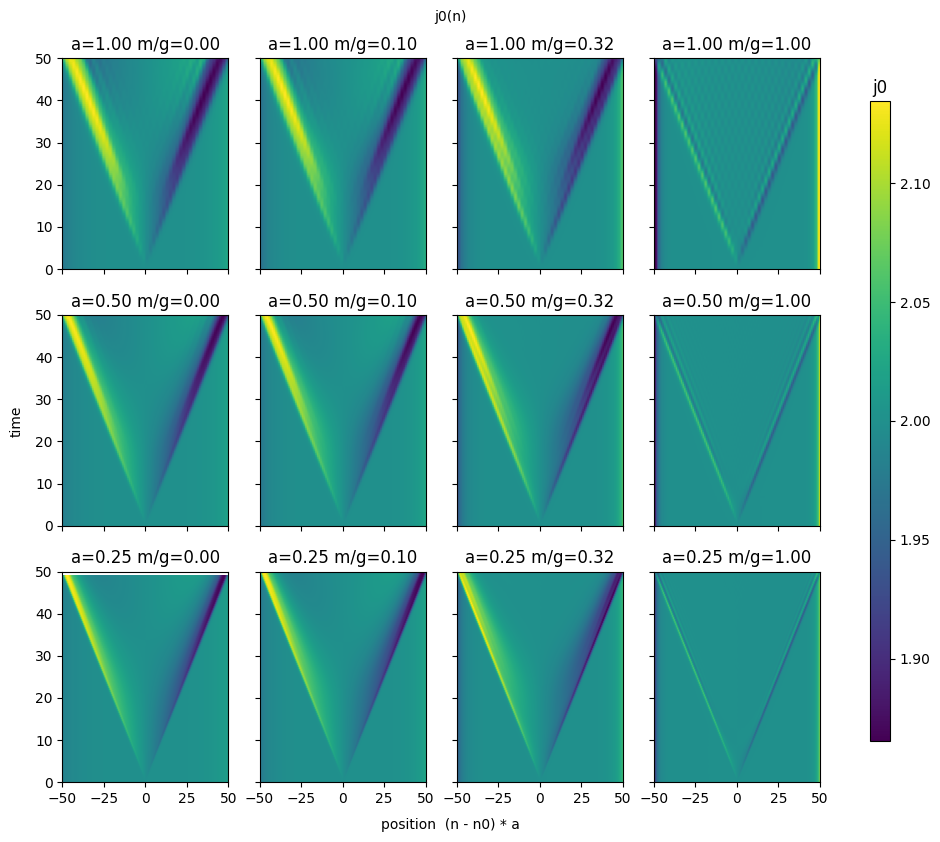

In [44]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 8))
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):

        ee = j0[m, N][:, 1:]
        tm = j0[m, N][:, 0]
        ee = (ee[:, 0::2] + ee[:, 1::2]) /2  #  here we calculate mean of sites 2*l and 2*l+1
        # ee0 = ee[0, :]
        # ee = ee - ee0
        # ee = ee / a

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]), origin='lower', aspect='auto') #, vmin=-0.16, vmax=0.16)
        ax[j, i].set_title(f"{a=:0.2f} {m/g=:0.2f}")
        ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 50])
        # ax[j, i].set_xlabel("position")
        # ax[j, i].set_ylabel("time")
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('j0')

fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'j0(n)', ha='center')

j1

Text(0.43, 1.0, 'j1(n)')

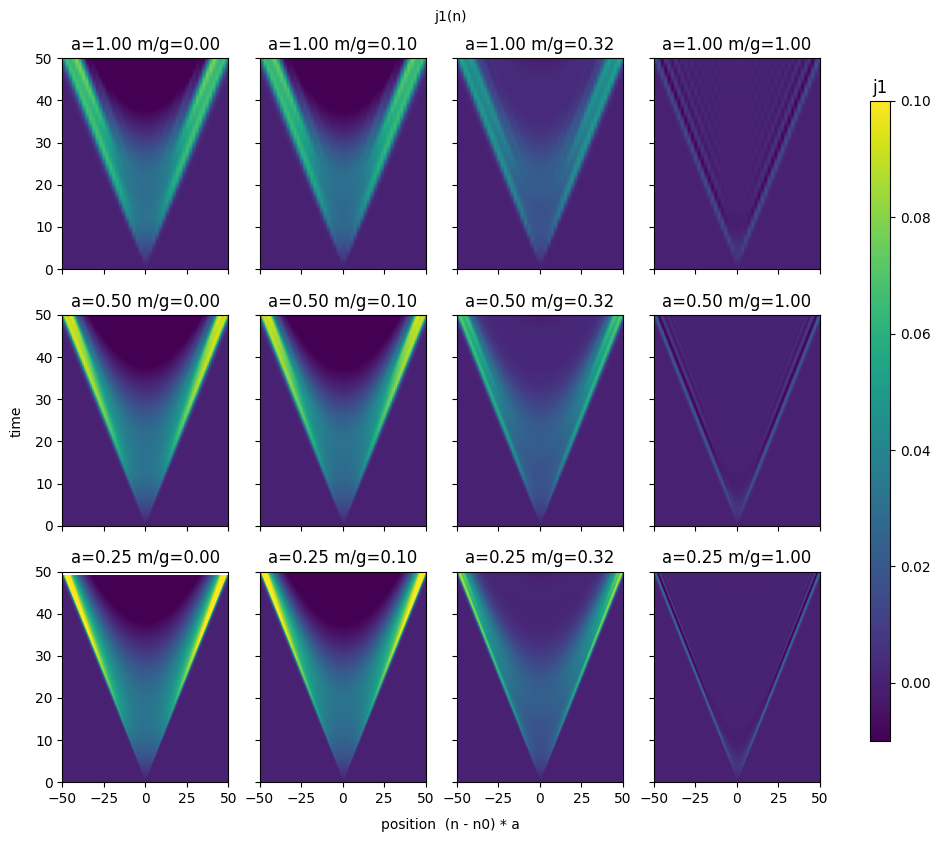

In [51]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 8))
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):

        ee = j1[m, N][:, 1:]
        tm = j1[m, N][:, 0]
        # ee = (ee[:, 0::2] + ee[:, 1::2]) /2  #  here we calculate mean of sites 2*l and 2*l+1
        # ee0 = ee[0, :]
        # ee = ee - ee0
        # ee = ee / a

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]), origin='lower', aspect='auto', vmin=-0.01, vmax=0.1)
        ax[j, i].set_title(f"{a=:0.2f} {m/g=:0.2f}")
        ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 50])
        # ax[j, i].set_xlabel("position")
        # ax[j, i].set_ylabel("time")
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('j1')

fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'j1(n)', ha='center')

Ln (here without Q(t) contribution)

Text(0.43, 1.0, 'j1(n)')

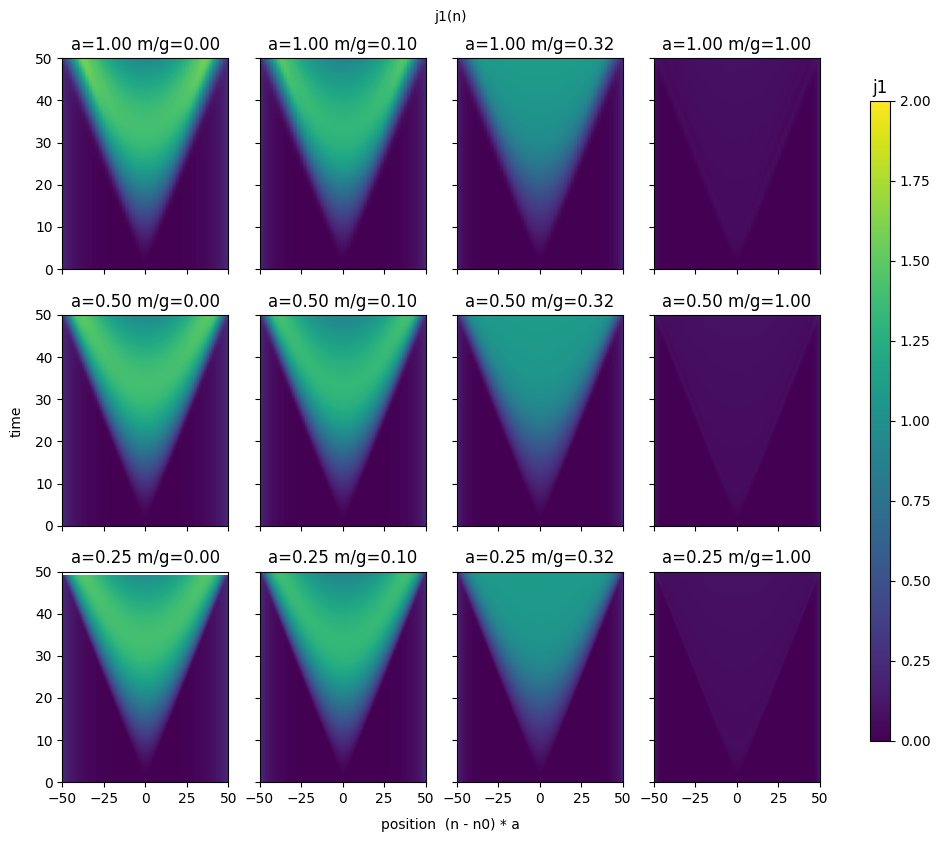

In [56]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 8))
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):

        ee = Ln[m, N][:, 1:]
        tm = Ln[m, N][:, 0]
        ee = (ee[:, 0::2] + ee[:, 1::2]) /2  #  here we calculate mean of sites 2*l and 2*l+1
        # ee0 = ee[0, :]
        # ee = ee - ee0
        # ee = ee / a

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]), origin='lower', aspect='auto', vmin=0, vmax=2)
        ax[j, i].set_title(f"{a=:0.2f} {m/g=:0.2f}")
        ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 50])
        # ax[j, i].set_xlabel("position")
        # ax[j, i].set_ylabel("time")
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('j1')

fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'j1(n)', ha='center')

In [47]:
N = 400
a = 0.25
v = 1
Q = 1
L0 = 0
dQ = np.zeros((101, N), dtype=np.float64)
times = np.linspace(0, N * a / (2 * v), 101)
for i, t in enumerate(times):
    for n in range(N):
        dQ[i, n] = dQn(n, t, (N - 1) / 2, L0, a, v, Q)

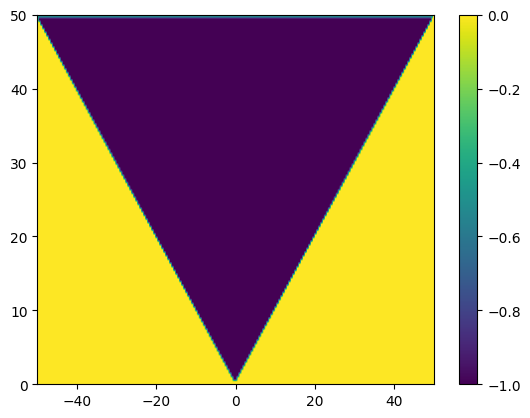

In [48]:
fig = plt.imshow(dQ, extent=(-N*a/2, N*a/2, 0, times[-1]), origin='lower', aspect='auto')
plt.colorbar(fig)

In [49]:
dQ

array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. , -0.5, -1. , ..., -0.5,  0. ,  0. ],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5,  0. ]])